In [90]:
%matplotlib inline
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [91]:
df_eventos = pd.read_csv("F:/Bibliotecas/Documentos/football-events/events.csv") #dt
df_dados_partida = pd.read_csv("F:/Bibliotecas/Documentos/football-events/ginf.csv") #dtt

In [92]:
df_eventos.columns

Index(['id_odsp', 'id_event', 'sort_order', 'time', 'text', 'event_type',
       'event_type2', 'side', 'event_team', 'opponent', 'player', 'player2',
       'player_in', 'player_out', 'shot_place', 'shot_outcome', 'is_goal',
       'location', 'bodypart', 'assist_method', 'situation', 'fast_break'],
      dtype='object')

In [93]:
evento_tentativa = 1 #Define o evento como tentativa de gol
na_meta = 1 
gol_true = 1         #Define o evento como gol
gol_false = 0        #Define que o evento não foi gol
penalti_concedido = 11  #Define que o 'event_type' foi penalti
alema = 'D1'
inglesa = 'E0'
espanhola = 'SP1'
italiana = 'I1'
francesa = 'F1'
##Evento
escanteio = 2

#### Criando dataframe associativo

In [94]:
df_juncao = pd.merge(df_nova_eventos, df_dados_partida, how='inner', on=['id_odsp', 'id_odsp'])

In [95]:
##TRABALHANDO NOS VALORES DOS GOLS E TENTATIVAS

In [96]:
##Pegar colunas especificas do DataFrame, correspondente as finalizações
df_nova_eventos = df_eventos[['id_odsp', 'id_event', 'sort_order', 'text', 'event_type', 'event_type2','side', 'event_team',
                              'opponent','player', 'player2', 'shot_place', 'shot_outcome', 'is_goal', 'location', 'bodypart',
                              'assist_method', 'situation']] #dct

In [97]:
df_dados_partida = df_dados_partida[['id_odsp', 'link_odsp', 'adv_stats', 'date', 'league', 'season',
       'country', 'ht', 'at', 'fthg', 'ftag']]

# 1.	QUAL O PERCENTUAL DE ACERTOS NOS CHUTES DOS CLUBES?

## Reduzindo os dados do DataFrame para os desejados

### Guardando os valores de tentativas que foram gols

In [98]:
df_gols = df_nova_eventos[(df_nova_eventos['event_type'] == evento_tentativa) & (df_nova_eventos['is_goal'] == gol_true)
                          & (df_nova_eventos['shot_outcome'] >= na_meta)]

### Guardando os registros de tentativas que não foram gols

In [99]:
df_tentativas = df_nova_eventos[(df_nova_eventos['event_type'] == evento_tentativa)]
## &(df_nova_eventos['is_goal'] == gol_false)

In [100]:
df_gols.columns


Index(['id_odsp', 'id_event', 'sort_order', 'text', 'event_type',
       'event_type2', 'side', 'event_team', 'opponent', 'player', 'player2',
       'shot_place', 'shot_outcome', 'is_goal', 'location', 'bodypart',
       'assist_method', 'situation'],
      dtype='object')

In [101]:
##ACIMA A TENTATIVA DE RESPONDER A QUESTÃO 1 (EM ANDAMENTO)

In [102]:
##Construindo um DataFrame com os valores necessários da tabela Ginf
dados_partida = df_dados_partida.columns[:-9] ##Não funciona (DESSA FORMA SÓ COPIA OS INDEXS)

In [103]:
df_eventos.columns

Index(['id_odsp', 'id_event', 'sort_order', 'time', 'text', 'event_type',
       'event_type2', 'side', 'event_team', 'opponent', 'player', 'player2',
       'player_in', 'player_out', 'shot_place', 'shot_outcome', 'is_goal',
       'location', 'bodypart', 'assist_method', 'situation', 'fast_break'],
      dtype='object')

## Criando uma junção natural entre os dois dataframes

In [104]:
gols = pd.merge(df_gols, df_dados_partida, how='inner', on=['id_odsp', 'id_odsp'])

In [105]:
gols[(gols['season'] == 2013) & (gols['league'] == inglesa)]

,id_odsp,id_event,sort_order,text,event_type,event_type2,side,event_team,opponent,player,...,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag


#### Devido a falta de informações do campeonato inglês das temporadas de 2012 e 2013, decidi retirar da análise geral com os outros campeonatos. 

In [106]:
gols.drop(gols[(gols.league == inglesa)].index, inplace = True)  ## (inplace = True) Substitui o dataframe pela saída do método

## Agrupando os dados por time e temporada

In [107]:
##Agrupando o quantitativo de gols de cada time por temporada
gols_temporada = gols.groupby(['event_team', 'season']).count()

gols_temp_geral = gols_temporada = gols.groupby(['event_team']).count()

### Exibindo os gols de cada time por temporada

In [108]:
gols_temporada.head()

,id_odsp,id_event,sort_order,text,event_type,event_type2,side,opponent,player,player2,...,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag
event_team,,,,,,,,,,,,,,,,,,,,,
AC Ajaccio,110,110,110,110,110,76,110,110,110,76,...,110,110,110,110,110,110,110,110,110,110
AC Milan,320,320,320,320,320,203,320,320,320,201,...,320,320,320,320,320,320,320,320,320,320
AJ Auxerre,46,46,46,46,46,29,46,46,46,29,...,46,46,46,46,46,46,46,46,46,46
AS Monaco,228,228,228,228,228,149,228,228,228,147,...,228,228,228,228,228,228,228,228,228,228
AS Nancy Lorraine,87,87,87,87,87,63,87,87,87,63,...,87,87,87,87,87,87,87,87,87,87


## Reazlizando uma junção dos dataframes

In [109]:
##Agrupando o quantitativo de gols de cada time por temporada
df_tentativas_temporada = pd.merge(df_tentativas, df_dados_partida, how='inner', on=['id_odsp', 'id_odsp'])

##### Removendo as tentativas do campeonato Inglês

In [110]:
df_tentativas_temporada.drop(df_tentativas_temporada[(df_tentativas_temporada.league == inglesa)].index, inplace = True)

#### Separando 2 dataframes, um agrupado por clube e outro por clube e emporada

In [111]:
tentativas_temporada = df_tentativas_temporada.groupby(['event_team', 'season']).count()

tentativas_temp_geral = df_tentativas_temporada.groupby(['event_team']).count()

In [112]:
tentativas_temp_geral.head()

,id_odsp,id_event,sort_order,text,event_type,event_type2,side,opponent,player,player2,...,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag
event_team,,,,,,,,,,,,,,,,,,,,,
AC Ajaccio,1106,1106,1106,1106,1106,766,1106,1106,1106,762,...,1106,1106,1106,1106,1106,1106,1106,1106,1106,1106
AC Milan,3065,3065,3065,3065,3065,2211,3065,3065,3065,2200,...,3065,3065,3065,3065,3065,3065,3065,3065,3065,3065
AJ Auxerre,446,446,446,446,446,302,446,446,446,302,...,446,446,446,446,446,446,446,446,446,446
AS Monaco,1665,1665,1665,1665,1665,1226,1665,1665,1665,1219,...,1665,1665,1665,1665,1665,1665,1665,1665,1665,1665
AS Nancy Lorraine,1058,1058,1058,1058,1058,792,1058,1058,1058,789,...,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058


#### Medindo a eficiencia por clube e temporada

In [113]:
eficiencia = (gols_temporada['id_event']/tentativas_temporada['id_event']) ##Questionar ao professor

In [114]:
eficiencia.head()

event_team  season
AC Ajaccio  2012      0.310734
            2013      0.273632
            2014      0.314286
AC Milan    2012      0.573477
            2013      0.501567
Name: id_event, dtype: float64

#### Medindo a eficiencia geral por clube

In [115]:
eficiencia_geral = (gols_temporada['id_event']/tentativas_temp_geral['id_event'])

In [116]:
eficiencia_geral.head()

event_team
AC Ajaccio           0.099458
AC Milan             0.104405
AJ Auxerre           0.103139
AS Monaco            0.136937
AS Nancy Lorraine    0.082231
Name: id_event, dtype: float64

#### Convertendo os objetos de Series para Frames, para poder utilizar os métodos da biblioteca matplotlib

In [117]:
df_eficiencia_geral = eficiencia_geral.to_frame()

In [118]:
df_eficiencia_geral.columns

Index(['id_event'], dtype='object')

In [119]:
df_eficiencia = eficiencia.to_frame()

#### Dados gerais do DataFrame de eficiencia geral

In [120]:
df_eficiencia_geral.describe()

,id_event
count,116.000000
mean,0.097970
std,0.019987
min,0.046341
25%,0.084944
50%,0.099255
75%,0.107677
max,0.177219


#### Reduzindo os dados por meio do histograma de eficiencia geral dos campeonatos

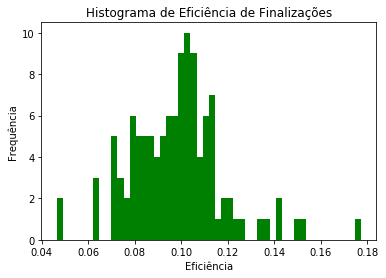

In [121]:
plt.title("Histograma de Eficiência de Finalizações")
plt.xlabel('Eficiência')
plt.ylabel('Frequência')

hist_eficiencia = plt.hist(df_eficiencia_geral['id_event'], facecolor="green", bins = 50)


In [122]:
plt.show()

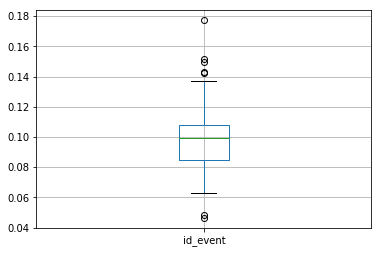

In [123]:
df_eficiencia_geral.boxplot(column='id_event')

In [124]:
dfe = eficiencia_geral.to_frame()

#### Time com maior eficiência

In [125]:
dfe[(dfe['id_event'] > 0.14 )]

,id_event
event_team,
Barcelona,0.177219
Bayern Munich,0.142811
Paris Saint-Germain,0.149398
RB Leipzig,0.142259
Real Madrid,0.151409


* Barcelona            | Espanhol
* Bayern Munich        | Alemão
* Paris Saint-Germain  | Francês
* RB Leipzig           | Alemão
* Real Madrid          | Espanhol


#### Time com menor eficiência

In [126]:
dfe[(dfe['id_event'] < 0.06 )]

,id_event
event_team,
Cordoba,0.048433
Kaiserslautern,0.046341


* Cordoba | Espanhol
* Kaiserslautern | Alemão

##### Percebe-se que um dos prováveis motivos de o Barcelona ser um dos melhores clubes do mundo pode estar diretamente relacionado ao alto índice de precisão em finalizações, acima da média dos demais clubes, sendo visto como outlier, conseguindo marcar 2 gols a cada 10 finalizações, em um quantitativo de 5 temporadas.

# 2.	QUAIS LIGAS TEM OS JOGOS MAIS VIOLENTOS?


In [127]:
falta = 3
df_faltas = df_nova_eventos[(df_nova_eventos['event_type'] == falta)]

#### Criando um DT associativo entre os dataframes

In [128]:
##df_ff = df_faltas[(df_faltas['id_odsp'] == 'UFot0hit/')]

In [129]:
df_faltas_union = pd.merge(df_faltas, df_dados_partida, how='inner', on=['id_odsp', 'id_odsp'])

In [130]:
df_faltas_agrupadas = df_faltas_union.groupby(['event_team'])

In [131]:
 #DATAFRAMES DE FALTAS DO CAMPEONATO ALEMÃO
df_faltas_alema_2012 = df_faltas_union[(df_faltas_union['league'] == alema) & 
                                       (df_faltas_union['season'] == 2012)]
df_faltas_alema_2013 = df_faltas_union[(df_faltas_union['league'] == alema) & 
                                       (df_faltas_union['season'] == 2013)]
df_faltas_alema_2014 = df_faltas_union[(df_faltas_union['league'] == alema) & 
                                       (df_faltas_union['season'] == 2014)]
df_faltas_alema_2015 = df_faltas_union[(df_faltas_union['league'] == alema) & 
                                       (df_faltas_union['season'] == 2015)]
df_faltas_alema_2016 = df_faltas_union[(df_faltas_union['league'] == alema) & 
                                       (df_faltas_union['season'] == 2016)]

#DATAFRAMES DE FALTAS DO CAMPEONATO INGLES
df_faltas_inglesa_2012 = df_faltas_union[(df_faltas_union['league'] == inglesa) & 
                                       (df_faltas_union['season'] == 2012)]
df_faltas_inglesa_2013 = df_faltas_union[(df_faltas_union['league'] == inglesa) & 
                                       (df_faltas_union['season'] == 2013)]
df_faltas_inglesa_2014 = df_faltas_union[(df_faltas_union['league'] == inglesa) & 
                                       (df_faltas_union['season'] == 2014)]
df_faltas_inglesa_2015 = df_faltas_union[(df_faltas_union['league'] == inglesa) & 
                                       (df_faltas_union['season'] == 2015)]
df_faltas_inglesa_2016 = df_faltas_union[(df_faltas_union['league'] == inglesa) & 
                                       (df_faltas_union['season'] == 2016)]
    
#DATAFRAMES DE FALTAS DO CAMPEONATO ESPANHOL
df_faltas_espanhola_2012 = df_faltas_union[(df_faltas_union['league'] == espanhola) & 
                                       (df_faltas_union['season'] == 2012)]
df_faltas_espanhola_2013 = df_faltas_union[(df_faltas_union['league'] == espanhola) & 
                                       (df_faltas_union['season'] == 2013)]
df_faltas_espanhola_2014 = df_faltas_union[(df_faltas_union['league'] == espanhola) & 
                                       (df_faltas_union['season'] == 2014)]
df_faltas_espanhola_2015 = df_faltas_union[(df_faltas_union['league'] == espanhola) & 
                                       (df_faltas_union['season'] == 2015)]
df_faltas_espanhola_2016 = df_faltas_union[(df_faltas_union['league'] == espanhola) & 
                                       (df_faltas_union['season'] == 2016)]

#DATAFRAMES DE FALTAS DO CAMPEONATO ITALIANO  
df_faltas_italiana_2012 = df_faltas_union[(df_faltas_union['league'] == italiana) & 
                                       (df_faltas_union['season'] == 2012)]
df_faltas_italiana_2013 = df_faltas_union[(df_faltas_union['league'] == italiana) & 
                                       (df_faltas_union['season'] == 2013)]
df_faltas_italiana_2014 = df_faltas_union[(df_faltas_union['league'] == italiana) & 
                                       (df_faltas_union['season'] == 2014)]
df_faltas_italiana_2015 = df_faltas_union[(df_faltas_union['league'] == italiana) & 
                                       (df_faltas_union['season'] == 2015)]
df_faltas_italiana_2016 = df_faltas_union[(df_faltas_union['league'] == italiana) & 
                                       (df_faltas_union['season'] == 2016)]
    
#DATAFRAMES DE FALTAS DO CAMPEONATO FRANCES
df_faltas_francesa_2012 = df_faltas_union[(df_faltas_union['league'] == francesa) & 
                                       (df_faltas_union['season'] == 2012)]
df_faltas_francesa_2013 = df_faltas_union[(df_faltas_union['league'] == francesa) & 
                                       (df_faltas_union['season'] == 2013)]
df_faltas_francesa_2014 = df_faltas_union[(df_faltas_union['league'] == francesa) & 
                                       (df_faltas_union['season'] == 2014)]
df_faltas_francesa_2015 = df_faltas_union[(df_faltas_union['league'] == francesa) & 
                                       (df_faltas_union['season'] == 2015)]
df_faltas_francesa_2016 = df_faltas_union[(df_faltas_union['league'] == francesa) & 
                                       (df_faltas_union['season'] == 2016)]

#### Contando as partidas do campeonato alemão

In [132]:
df_partidas_alema_2012 = df_dados_partida[(df_dados_partida['league'] == alema) & (df_dados_partida['season'] == 2012)]
df_partidas_alema_2013 = df_dados_partida[(df_dados_partida['league'] == alema) & (df_dados_partida['season'] == 2013)]
df_partidas_alema_2014 = df_dados_partida[(df_dados_partida['league'] == alema) & (df_dados_partida['season'] == 2014)]
df_partidas_alema_2015 = df_dados_partida[(df_dados_partida['league'] == alema) & (df_dados_partida['season'] == 2015)]
df_partidas_alema_2016 = df_dados_partida[(df_dados_partida['league'] == alema) & (df_dados_partida['season'] == 2016)]

alema_league_2012 = df_partidas_alema_2012['id_odsp'].count()
alema_league_2013 = df_partidas_alema_2012['id_odsp'].count()
alema_league_2014 = df_partidas_alema_2012['id_odsp'].count()
alema_league_2015 = df_partidas_alema_2012['id_odsp'].count()
alema_league_2016 = df_partidas_alema_2012['id_odsp'].count()


In [133]:
indice_alema_2012 = df_faltas_alema_2012['id_odsp'].count()/alema_league_2012
indice_alema_2013 = df_faltas_alema_2013['id_odsp'].count()/alema_league_2013
indice_alema_2014 = df_faltas_alema_2014['id_odsp'].count()/alema_league_2014
indice_alema_2015 = df_faltas_alema_2015['id_odsp'].count()/alema_league_2015
indice_alema_2016 = df_faltas_alema_2016['id_odsp'].count()/alema_league_2016

#### Contando as partidas do campeonato Inglês

In [134]:
df_partidas_inglesa_2012 = df_dados_partida[(df_dados_partida['league'] == inglesa) & (df_dados_partida['season'] == 2012)]
df_partidas_inglesa_2013 = df_dados_partida[(df_dados_partida['league'] == inglesa) & (df_dados_partida['season'] == 2013)]
df_partidas_inglesa_2014 = df_dados_partida[(df_dados_partida['league'] == inglesa) & (df_dados_partida['season'] == 2014)]
df_partidas_inglesa_2015 = df_dados_partida[(df_dados_partida['league'] == inglesa) & (df_dados_partida['season'] == 2015)]
df_partidas_inglesa_2016 = df_dados_partida[(df_dados_partida['league'] == inglesa) & (df_dados_partida['season'] == 2016)]

inglesa_league_2012 = df_partidas_inglesa_2012['id_odsp'].count()
inglesa_league_2013 = df_partidas_inglesa_2012['id_odsp'].count()
inglesa_league_2014 = df_partidas_inglesa_2012['id_odsp'].count()
inglesa_league_2015 = df_partidas_inglesa_2012['id_odsp'].count()
inglesa_league_2016 = df_partidas_inglesa_2012['id_odsp'].count()

In [135]:
indice_inglesa_2012 = df_faltas_inglesa_2012['id_odsp'].count()/inglesa_league_2012
indice_inglesa_2013 = df_faltas_inglesa_2013['id_odsp'].count()/inglesa_league_2013
indice_inglesa_2014 = df_faltas_inglesa_2014['id_odsp'].count()/inglesa_league_2014
indice_inglesa_2015 = df_faltas_inglesa_2015['id_odsp'].count()/inglesa_league_2015
indice_inglesa_2016 = df_faltas_inglesa_2016['id_odsp'].count()/inglesa_league_2016

#### Contando as partidas do campeonato Espanhol

In [136]:
df_partidas_espanhola_2012 = df_dados_partida[(df_dados_partida['league'] == espanhola) & (df_dados_partida['season'] == 2012)]
df_partidas_espanhola_2013 = df_dados_partida[(df_dados_partida['league'] == espanhola) & (df_dados_partida['season'] == 2013)]
df_partidas_espanhola_2014 = df_dados_partida[(df_dados_partida['league'] == espanhola) & (df_dados_partida['season'] == 2014)]
df_partidas_espanhola_2015 = df_dados_partida[(df_dados_partida['league'] == espanhola) & (df_dados_partida['season'] == 2015)]
df_partidas_espanhola_2016 = df_dados_partida[(df_dados_partida['league'] == espanhola) & (df_dados_partida['season'] == 2016)]

espanhola_league_2012 = df_partidas_espanhola_2012['id_odsp'].count()
espanhola_league_2013 = df_partidas_espanhola_2012['id_odsp'].count()
espanhola_league_2014 = df_partidas_espanhola_2012['id_odsp'].count()
espanhola_league_2015 = df_partidas_espanhola_2012['id_odsp'].count()
espanhola_league_2016 = df_partidas_espanhola_2012['id_odsp'].count()

In [137]:
indice_espanhola_2012 = df_faltas_espanhola_2012['id_odsp'].count()/espanhola_league_2012
indice_espanhola_2013 = df_faltas_espanhola_2013['id_odsp'].count()/espanhola_league_2013
indice_espanhola_2014 = df_faltas_espanhola_2014['id_odsp'].count()/espanhola_league_2014
indice_espanhola_2015 = df_faltas_espanhola_2015['id_odsp'].count()/espanhola_league_2015
indice_espanhola_2016 = df_faltas_espanhola_2016['id_odsp'].count()/espanhola_league_2016

#### Contando partidas do campeonato Italiano

In [138]:
df_partidas_italiana_2012 = df_dados_partida[(df_dados_partida['league'] == italiana) & (df_dados_partida['season'] == 2012)]
df_partidas_italiana_2013 = df_dados_partida[(df_dados_partida['league'] == italiana) & (df_dados_partida['season'] == 2013)]
df_partidas_italiana_2014 = df_dados_partida[(df_dados_partida['league'] == italiana) & (df_dados_partida['season'] == 2014)]
df_partidas_italiana_2015 = df_dados_partida[(df_dados_partida['league'] == italiana) & (df_dados_partida['season'] == 2015)]
df_partidas_italiana_2016 = df_dados_partida[(df_dados_partida['league'] == italiana) & (df_dados_partida['season'] == 2016)]

italiana_league_2012 = df_partidas_italiana_2012['id_odsp'].count()
italiana_league_2013 = df_partidas_italiana_2012['id_odsp'].count()
italiana_league_2014 = df_partidas_italiana_2012['id_odsp'].count()
italiana_league_2015 = df_partidas_italiana_2012['id_odsp'].count()
italiana_league_2016 = df_partidas_italiana_2012['id_odsp'].count()

In [139]:
indice_italiana_2012 = df_faltas_italiana_2012['id_odsp'].count()/italiana_league_2012
indice_italiana_2013 = df_faltas_italiana_2013['id_odsp'].count()/italiana_league_2013
indice_italiana_2014 = df_faltas_italiana_2014['id_odsp'].count()/italiana_league_2014
indice_italiana_2015 = df_faltas_italiana_2015['id_odsp'].count()/italiana_league_2015
indice_italiana_2016 = df_faltas_italiana_2016['id_odsp'].count()/italiana_league_2016

#### Contando partidas do campeonato Frances

In [140]:
df_partidas_francesa_2012 = df_dados_partida[(df_dados_partida['league'] == francesa) & (df_dados_partida['season'] == 2012)]
df_partidas_francesa_2013 = df_dados_partida[(df_dados_partida['league'] == francesa) & (df_dados_partida['season'] == 2013)]
df_partidas_francesa_2014 = df_dados_partida[(df_dados_partida['league'] == francesa) & (df_dados_partida['season'] == 2014)]
df_partidas_francesa_2015 = df_dados_partida[(df_dados_partida['league'] == francesa) & (df_dados_partida['season'] == 2015)]
df_partidas_francesa_2016 = df_dados_partida[(df_dados_partida['league'] == francesa) & (df_dados_partida['season'] == 2016)]

francesa_league_2012 = df_partidas_francesa_2012['id_odsp'].count()
francesa_league_2013 = df_partidas_francesa_2012['id_odsp'].count()
francesa_league_2014 = df_partidas_francesa_2012['id_odsp'].count()
francesa_league_2015 = df_partidas_francesa_2012['id_odsp'].count()
francesa_league_2016 = df_partidas_francesa_2012['id_odsp'].count()

In [141]:
indice_francesa_2012 = df_faltas_francesa_2012['id_odsp'].count()/francesa_league_2012
indice_francesa_2013 = df_faltas_francesa_2013['id_odsp'].count()/francesa_league_2013
indice_francesa_2014 = df_faltas_francesa_2014['id_odsp'].count()/francesa_league_2014
indice_francesa_2015 = df_faltas_francesa_2015['id_odsp'].count()/francesa_league_2015
indice_francesa_2016 = df_faltas_francesa_2016['id_odsp'].count()/francesa_league_2016

In [142]:
indice_alema_2016

26.388888888888889

#### Criando dataframes separando os índices médios de Faltas cometidas nas ligas por temporada

In [143]:
#Liga ALEMÃ
faltas_alema = pd.DataFrame(
    {
    "ano": ['2012', '2013', '2014', '2015', '2016'],
    "indice": [indice_alema_2012, indice_alema_2013, indice_alema_2014, indice_alema_2015, indice_alema_2016]
    }
)

In [144]:
#Liga INGLESA
faltas_inglesa = pd.DataFrame(
    {
    "ano": ['2012', '2013', '2014', '2015', '2016'],
    "indice": [indice_inglesa_2012, indice_inglesa_2013, indice_inglesa_2014, indice_inglesa_2015, indice_inglesa_2016]
    }
)

In [145]:
#Liga ESPANHOLA
faltas_espanhola = pd.DataFrame(
    {
    "ano": ['2012', '2013', '2014', '2015', '2016'],
    "indice": [indice_espanhola_2012, indice_espanhola_2013, indice_espanhola_2014, indice_espanhola_2015, indice_espanhola_2016]
    }
)

In [146]:
#Liga ITALIANA
faltas_italiana = pd.DataFrame(
    {
    "ano": ['2012', '2013', '2014', '2015', '2016'],
    "indice": [indice_italiana_2012, indice_italiana_2013, indice_italiana_2014, indice_italiana_2015, indice_italiana_2016]
    }
)

In [147]:
#Liga FRANCESA
faltas_francesa = pd.DataFrame(
    {
    "ano": ['2012', '2013', '2014', '2015', '2016'],
    "indice": [indice_francesa_2012, indice_francesa_2013, indice_francesa_2014, indice_francesa_2015, indice_francesa_2016]
    }
)

#### Plotando um gráfico de linhas resumindo os dados das médias de faltas de cada liga

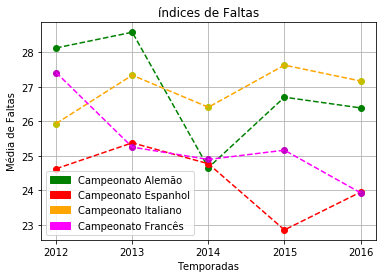

In [148]:
eixo_temporadas = faltas_alema['ano']
plt.plot(eixo_temporadas, faltas_alema['indice'], 'go')
plt.plot(eixo_temporadas, faltas_alema['indice'], '--', color='green')

#plt.plot(eixo_temporadas, faltas_inglesa['indice'], 'bo')
#plt.plot(eixo_temporadas, faltas_inglesa['indice'], 'k:', color='blue')

plt.plot(eixo_temporadas, faltas_espanhola['indice'], 'ro')
plt.plot(eixo_temporadas, faltas_espanhola['indice'], '--', color='red')

plt.plot(eixo_temporadas, faltas_italiana['indice'], 'yo')
plt.plot(eixo_temporadas, faltas_italiana['indice'], '--', color='orange')

plt.plot(eixo_temporadas, faltas_francesa['indice'], 'mo')
plt.plot(eixo_temporadas, faltas_francesa['indice'], '--', color='magenta')

plt.title("índices de Faltas")

##plt.axis([eixo_temporadas.min(), eixo_temporadas.max(), 22, 30])

plt.grid(True)
plt.xlabel("Temporadas")
plt.ylabel("Média de Faltas")

verde_patch = mpatches.Patch(color='green', label='Campeonato Alemão')
vermelho_patch = mpatches.Patch(color='red', label='Campeonato Espanhol')
laranja_patch = mpatches.Patch(color='orange', label='Campeonato Italiano')
magenta_patch = mpatches.Patch(color='magenta', label='Campeonato Francês')

plt.legend(handles=[verde_patch, vermelho_patch, laranja_patch, magenta_patch])

# 3.	QUAIS OS JOGADORES MAIS FALTOSOS?



In [207]:
df_rank_faltas_alema_2012 = df_faltas_alema_2012.groupby(['player']).count()

In [222]:
df_rank_faltas_alema_2012 = df_rank_faltas_alema_2012['id_odsp']

#### Verificando jogador mais faltoso

In [228]:
filtro_max_faltas_alema_2012 = df_rank_faltas_alema_2012[(df_rank_faltas_alema_2012 == max(df_rank_faltas_alema_2012))]
filtro_max_faltas_alema_2012

player
mario mandzukic    80
Name: id_odsp, dtype: int64

** Mario Mandzukic  | Atacante | Bayern de Munique | 80 Faltas | Segundo a análise, o jogador mais faltoso de 2012.**

**Acreditava que seria um volante ou zagueiro**.

In [234]:
df_rank_faltas_alema_2013 = df_faltas_alema_2013.groupby(['player']).count()
df_rank_faltas_alema_2013 = df_rank_faltas_alema_2013['id_odsp']

filtro_max_faltas_alema_2013 = df_rank_faltas_alema_2013[(df_rank_faltas_alema_2013 == max(df_rank_faltas_alema_2013))]
filtro_max_faltas_alema_2013

player
stefan kiessling    79
Name: id_odsp, dtype: int64

**Stefan Kiessling | Atacante | Bayer Leverkusen | 79 Faltas | Segundo a análise, o jogador mais faltoso de 2013.**

#### Calculando os valores de 2014

In [236]:
df_rank_faltas_italiana_2014 = df_faltas_italiana_2014.groupby(['player']).count()
df_rank_faltas_italiana_2014 = df_rank_faltas_italiana_2014['id_odsp']

filtro_max_faltas_italiana_2014 = df_rank_faltas_italiana_2014[(df_rank_faltas_italiana_2014 == max(df_rank_faltas_italiana_2014))]
filtro_max_faltas_italiana_2014

player
perparim hetemaj    99
Name: id_odsp, dtype: int64

** Përparim Hetemaj | Chievo | Meia | 99 Faltas | Segundo a análise, o jogador mais faltoso de 2014.**

** Calculando valores para 2015**

In [238]:
df_rank_faltas_italiana_2015 = df_faltas_italiana_2015.groupby(['player']).count()
df_rank_faltas_italiana_2015 = df_rank_faltas_italiana_2015['id_odsp']

filtro_max_faltas_italiana_2015 = df_rank_faltas_italiana_2015[(df_rank_faltas_italiana_2015 == max(df_rank_faltas_italiana_2015))]
filtro_max_faltas_italiana_2015

player
stefano okaka    87
Name: id_odsp, dtype: int64

**Stefano Okaka | Sampdoria  | Atacante  | 87 Faltas  | Segundo a análise, o jogador mais faltoso de 2015.**

**Calculando valores de 2016.**

In [241]:
df_rank_faltas_italiana_2016 = df_faltas_italiana_2016.groupby(['player']).count()
df_rank_faltas_italiana_2016 = df_rank_faltas_italiana_2016['id_odsp']

filtro_max_faltas_italiana_2016 = df_rank_faltas_italiana_2016[(df_rank_faltas_italiana_2016 == max(df_rank_faltas_italiana_2016))]
filtro_max_faltas_italiana_2016

player
franco vazquez    107
Name: id_odsp, dtype: int64

**Franco Vazquez | Palermo | Meia  | 107 Faltas  | Segundo a análise, o jogador mais faltoso de 2016.**

# 4.	QUAL JOGADOR MAIS COMETEU FALTAS DE TODAS AS TEMPORADAS E DE TODAS AS LIGAS?

**Respondido anteriormente.**

# 5.	ENTRE OS JOGADORES MAIS FALTOSOS DO CAMPEONATO INGLÊS, ITALIANO E O ESPANHOL, QUAL TEM O MELHOR DESEMPENHO?

# 6.	QUAIS CLUBES ACERTAM MAIS ESCANTEIOS?


In [150]:
df_escanteios = df_nova_eventos[(df_nova_eventos['event_type'] == escanteio)]
escanteios = pd.merge(df_escanteios, df_dados_partida, how='inner', on=['id_odsp', 'id_odsp'])

In [151]:
df_ligas_escanteios = escanteios.groupby(['event_team', 'season']).count()

#### Coletando os dados referente a escanteios que foram gols

In [152]:
corner_left_bottom = 3
corner_left_top = 4
corner_rigth_bottom = 12
corner_rigth_top = 13
#3	Bottom left corner
#4	Bottom right corner
#12	Top left corner
#13	Top right corner

df_assistencia_escanteio = df_gols[(df_gols['assist_method'] == 2)  & 
        ((df_gols['shot_place'] >= corner_left_bottom) & (df_gols['shot_place'] <= corner_left_top) | 
         (df_gols['shot_place'] >= corner_rigth_bottom) & (df_gols['shot_place'] <= corner_rigth_top))]

#### Criando dataframe associativo dos dados

#### Pegando valores dos escanteios que não resultaram em gols

In [153]:
df_escanteios = df_juncao[(df_juncao['is_goal'] == gol_false) & 
                            (df_juncao['shot_place'] >= corner_left_bottom) & (df_juncao['shot_place'] <= corner_left_top)
                          |(df_juncao['shot_place'] >= corner_rigth_bottom) & (df_juncao['shot_place'] <= corner_rigth_top)]
                            

In [154]:
df_escanteios

,id_odsp,id_event,sort_order,text,event_type,event_type2,side,event_team,opponent,player,...,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
11,UFot0hit/,UFot0hit12,12,Attempt missed. Shinji Kagawa (Borussia Dortmu...,1,12.0,1,Borussia Dortmund,Hamburg SV,shinji kagawa,...,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN
112,Aw5DflLH/,Aw5DflLH3,3,Attempt saved. Jonas De Roeck (FC Augsburg) he...,1,12.0,1,FC Augsburg,SC Freiburg,jonas de roeck,...,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
147,Aw5DflLH/,Aw5DflLH38,38,Attempt saved. Marcel Ndjeng (FC Augsburg) rig...,1,12.0,1,FC Augsburg,SC Freiburg,marcel ndjeng,...,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
171,Aw5DflLH/,Aw5DflLH62,62,Attempt saved. Cedric Makiadi (SC Freiburg) ri...,1,12.0,2,SC Freiburg,FC Augsburg,cedric makiadi,...,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
183,Aw5DflLH/,Aw5DflLH74,74,"Goal! FC Augsburg 1, SC Freiburg 1. Sascha Mo...",1,12.0,1,FC Augsburg,SC Freiburg,sascha molders,...,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
184,Aw5DflLH/,Aw5DflLH75,75,"Goal! FC Augsburg 1, SC Freiburg 2. Cedric Ma...",1,12.0,2,SC Freiburg,FC Augsburg,cedric makiadi,...,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
204,Aw5DflLH/,Aw5DflLH95,95,Attempt saved. Sascha Molders (FC Augsburg) he...,1,12.0,1,FC Augsburg,SC Freiburg,sascha molders,...,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
229,Aw5DflLH/,Aw5DflLH120,120,Attempt saved. Garra Dembele (SC Freiburg) rig...,1,12.0,2,SC Freiburg,FC Augsburg,garra dembele,...,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
238,bkjpaC6n/,bkjpaC6n7,7,Attempt saved. Lennart Thy (SV Werder Bremen) ...,1,12.0,1,Werder Bremen,Kaiserslautern,lennart thy,...,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN
266,bkjpaC6n/,bkjpaC6n35,35,Attempt saved. Aaron Hunt (SV Werder Bremen) l...,1,12.0,1,Werder Bremen,Kaiserslautern,aaron hunt,...,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN


In [155]:
gp = pd.merge(df_assistencia_escanteio, df_dados_partida, how='inner', on=['id_odsp', 'id_odsp'])

#### Agrupando os escanteios por time

In [156]:
escanteios = df_escanteios.groupby(['event_team']).count()

##### Agrupando os gls por time

In [157]:
escanteios_gol = df_assistencia_escanteio.groupby(['event_team']).count()

#### Calculando a eficiencia em escanteios

In [158]:
eficiencia_escanteios = escanteios_gol['id_odsp']/escanteios['id_odsp']
eficiencia_escanteios

event_team
AC Ajaccio                    0.146341
AC Milan                      0.085288
AJ Auxerre                    0.109589
AS Monaco                     0.147541
AS Nancy Lorraine             0.113772
AS Roma                       0.104364
Alaves                        0.217391
Almeria                       0.142857
Angers                        0.098039
Arsenal                       0.100592
Aston Villa                   0.112994
Atalanta                      0.134247
Athletic Bilbao               0.203753
Atletico Madrid               0.167488
Barcelona                     0.106299
Bastia                        0.123134
Bayer Leverkusen              0.070560
Bayern Munich                 0.122137
Bologna                       0.087087
Bordeaux                      0.143590
Borussia Dortmund             0.104167
Borussia Monchengladbach      0.064615
Bournemouth                   0.142857
Brest                         0.034014
Burnley                       0.086420
Caen          

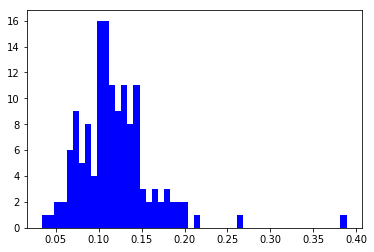

In [254]:
 hist_escanteios = plt.hist(eficiencia_escanteios['id_odsp'], facecolor="blue", bins = 50)

#### Time com maior eficiencia em escanteios

In [159]:
df_filtro_max = eficiencia_escanteios[(eficiencia_escanteios == max(eficiencia_escanteios))]
df_filtro_max

event_team
Middlesbrough    0.388889
Name: id_odsp, dtype: float64

#### Time com menor eficiencia em escanteios

In [160]:
df_filtro_min = eficiencia_escanteios[(eficiencia_escanteios == min(eficiencia_escanteios))]
df_filtro_min

event_team
Brest    0.034014
Name: id_odsp, dtype: float64

In [161]:
eficiencia_escanteios = eficiencia_escanteios.to_frame()

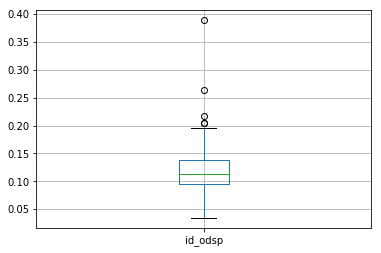

In [162]:
eficiencia_escanteios.boxplot()

#### Exibindo os clubes que estão acima da média (Outliers)

In [163]:
eficiencia_escanteios[(eficiencia_escanteios['id_odsp'] > 0.2)]

,id_odsp
event_team,
Alaves,0.217391
Athletic Bilbao,0.203753
GFC Ajaccio,0.263158
Middlesbrough,0.388889
QPR,0.203704


* Alavés -> Espanhol
* Athletic Bilbao -> Espanhol
* GFC Ajaccio -> Francês
* Middlesbrough -> Inglês
* QPR -> Inglês


# 7.	QUAL O PERCENTUAL DE APROVEITAMENTO DOS JOGOS EM CASA ENTRE BARCELONA E REAL MADRID?

# 8.	QUEM TEVE O MELHOR DESEMPENHO ENTRE 2012 E 2016, C. RONALDO OU MESSI?

# 9.	QUAL A FREQUÊNCIA DE CHUTES DE LONGA DISTÂNCIA DAS PARTIDAS DA LIGA ESPANHOLA?

#### Tratando as tentativas (finalizações) da liga espanhola

In [164]:
Longa_distancia = 16 
mais_32_metros = 17
mais_36_metros = 18

#16	Long range
#17	More than 35 yards 
#18	More than 40 yards

1 jarda = 0,9144 metro 

In [165]:
df_tentativas_espanhola_2012 = df_tentativas_temporada[(df_tentativas_temporada.league == espanhola) 
                                                       & (df_tentativas_temporada.season == 2012)]
df_tentativas_espanhola_2013 = df_tentativas_temporada[(df_tentativas_temporada.league == espanhola) 
                                                       & (df_tentativas_temporada.season == 2013)]
df_tentativas_espanhola_2014 = df_tentativas_temporada[(df_tentativas_temporada.league == espanhola) 
                                                       & (df_tentativas_temporada.season == 2014)]
df_tentativas_espanhola_2015 = df_tentativas_temporada[(df_tentativas_temporada.league == espanhola) 
                                                       & (df_tentativas_temporada.season == 2015)]
df_tentativas_espanhola_2016 = df_tentativas_temporada[(df_tentativas_temporada.league == espanhola) 
                                                       & (df_tentativas_temporada.season == 2016)]

#### Pegando os eventos que se caracterizam de longa distância

In [166]:
df_longa_esp_2012 = df_tentativas_espanhola_2012[(df_tentativas_espanhola_2012.location == 16) | 
                            (df_tentativas_espanhola_2012.location == 17) | 
                            (df_tentativas_espanhola_2012.location == 18)]

df_longa_esp_2013 = df_tentativas_espanhola_2013[(df_tentativas_espanhola_2013.location == 16) | 
                            (df_tentativas_espanhola_2013.location == 17) | 
                            (df_tentativas_espanhola_2013.location == 18)]

df_longa_esp_2014 = df_tentativas_espanhola_2014[(df_tentativas_espanhola_2014.location == 16) | 
                            (df_tentativas_espanhola_2014.location == 17) | 
                            (df_tentativas_espanhola_2014.location == 18)]

df_longa_esp_2015 = df_tentativas_espanhola_2015[(df_tentativas_espanhola_2015.location == 16) | 
                            (df_tentativas_espanhola_2015.location == 17) | 
                            (df_tentativas_espanhola_2015.location == 18)]

df_longa_esp_2016 = df_tentativas_espanhola_2016[(df_tentativas_espanhola_2016.location == 16) | 
                            (df_tentativas_espanhola_2016.location == 17) | 
                            (df_tentativas_espanhola_2016.location == 18)]

##### Fazendo comparativo entre Real Madrid e Barcelona

In [167]:
chutes_barca_2012 = df_tentativas_espanhola_2012[(df_tentativas_espanhola_2012.event_team == 'Barcelona')]['event_team'].count()
chutes_barca_2013 = df_tentativas_espanhola_2013[(df_tentativas_espanhola_2013.event_team == 'Barcelona')]['event_team'].count()
chutes_barca_2014 = df_tentativas_espanhola_2014[(df_tentativas_espanhola_2014.event_team == 'Barcelona')]['event_team'].count()
chutes_barca_2015 = df_tentativas_espanhola_2015[(df_tentativas_espanhola_2015.event_team == 'Barcelona')]['event_team'].count()
chutes_barca_2016 = df_tentativas_espanhola_2016[(df_tentativas_espanhola_2016.event_team == 'Barcelona')]['event_team'].count()


chutes_real_2012 = df_tentativas_espanhola_2012[(df_tentativas_espanhola_2012.event_team == 'Real Madrid')]['event_team'].count()
chutes_real_2013 = df_tentativas_espanhola_2013[(df_tentativas_espanhola_2013.event_team == 'Real Madrid')]['event_team'].count()
chutes_real_2014 = df_tentativas_espanhola_2014[(df_tentativas_espanhola_2014.event_team == 'Real Madrid')]['event_team'].count()
chutes_real_2015 = df_tentativas_espanhola_2015[(df_tentativas_espanhola_2015.event_team == 'Real Madrid')]['event_team'].count()
chutes_real_2016 = df_tentativas_espanhola_2016[(df_tentativas_espanhola_2016.event_team == 'Real Madrid')]['event_team'].count()


In [168]:
longo_barca_2012 = df_longa_esp_2012[(df_longa_esp_2012.event_team == 'Barcelona')]['event_team'].count()
longo_barca_2013 = df_longa_esp_2013[(df_longa_esp_2013.event_team == 'Barcelona')]['event_team'].count()
longo_barca_2014 = df_longa_esp_2014[(df_longa_esp_2014.event_team == 'Barcelona')]['event_team'].count()
longo_barca_2015 = df_longa_esp_2015[(df_longa_esp_2015.event_team == 'Barcelona')]['event_team'].count()
longo_barca_2016 = df_longa_esp_2016[(df_longa_esp_2016.event_team == 'Barcelona')]['event_team'].count()


longo_real_2012 = df_longa_esp_2012[(df_longa_esp_2012.event_team == 'Real Madrid')]['event_team'].count()
longo_real_2013 = df_longa_esp_2013[(df_longa_esp_2013.event_team == 'Real Madrid')]['event_team'].count()
longo_real_2014 = df_longa_esp_2014[(df_longa_esp_2014.event_team == 'Real Madrid')]['event_team'].count()
longo_real_2015 = df_longa_esp_2015[(df_longa_esp_2015.event_team == 'Real Madrid')]['event_team'].count()
longo_real_2016 = df_longa_esp_2016[(df_longa_esp_2016.event_team == 'Real Madrid')]['event_team'].count()

In [169]:
barca_2012 = longo_barca_2012 / chutes_barca_2012
barca_2013 = longo_barca_2013 / chutes_barca_2013
barca_2014 = longo_barca_2014 / chutes_barca_2014
barca_2015 = longo_barca_2015 / chutes_barca_2015
barca_2016 = longo_barca_2016 / chutes_barca_2016

real_2012 = longo_real_2012 / chutes_real_2012
real_2013 = longo_real_2013 / chutes_real_2013
real_2014 = longo_real_2014 / chutes_real_2014
real_2015 = longo_real_2015 / chutes_real_2015
real_2016 = longo_real_2016 / chutes_real_2016

In [170]:
#Barcelona
df_Barcelona = pd.DataFrame(
    {
    "ano": ['2012', '2013', '2014', '2015', '2016'],
    "indice_chute_longo": [barca_2012, barca_2013, barca_2014, 
               barca_2015, barca_2016]
    }
)

In [171]:
#Real Madrid
df_Real = pd.DataFrame(
    {
    "ano": ['2012', '2013', '2014', '2015', '2016'],
    "indice_chute_longo": [real_2012, real_2013, real_2014, 
               real_2015, real_2016]
    }
)

In [172]:
df_Real['indice_chute_longo'].mean()

0.010478183757157698

#### Pegando a frequencia de finalizações de longa distancia da liga espanhola de 2012 a 2016

In [173]:
espanhola2012_longo_alcance = df_longa_esp_2012['event_team'].count() / df_tentativas_espanhola_2012['event_team'].count() 
espanhola2013_longo_alcance = df_longa_esp_2013['event_team'].count() / df_tentativas_espanhola_2013['event_team'].count()
espanhola2014_longo_alcance = df_longa_esp_2014['event_team'].count() / df_tentativas_espanhola_2014['event_team'].count() 
espanhola2015_longo_alcance = df_longa_esp_2015['event_team'].count() / df_tentativas_espanhola_2015['event_team'].count() 
espanhola2016_longo_alcance = df_longa_esp_2016['event_team'].count() / df_tentativas_espanhola_2016['event_team'].count() 


In [174]:
#Liga ESPANHOLA
df_longa_distancia_espanhola = pd.DataFrame(
    {
    "ano": ['2012', '2013', '2014', '2015', '2016'],
    "indice": [espanhola2012_longo_alcance, espanhola2013_longo_alcance, espanhola2014_longo_alcance, 
               espanhola2015_longo_alcance, espanhola2016_longo_alcance]
    }
)

In [175]:
df_longa_distancia_espanhola

,ano,indice
0,2012,0.023449
1,2013,0.020454
2,2014,0.021914
3,2015,0.018708
4,2016,0.017286


#### Plotando um gráfico com os valores das temporadas

Text(0,0.5,'Média de Chutes Longos')

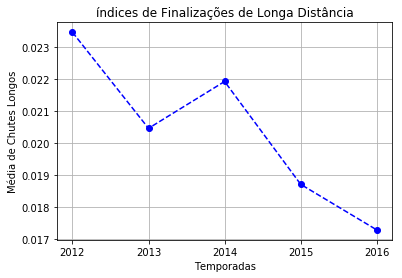

In [176]:
eixo_temporadas = df_longa_distancia_espanhola['ano']
plt.plot(eixo_temporadas, df_longa_distancia_espanhola['indice'], 'go', color='blue')
plt.plot(eixo_temporadas, df_longa_distancia_espanhola['indice'], '--', color='blue')

plt.title("índices de Finalizações de Longa Distância")
plt.grid(True)
plt.xlabel("Temporadas")
plt.ylabel("Média de Chutes Longos")

# 10.	QUAL CLUBE TEM MAIORES INDICES DE CHUTES A LONGA DISTÂNCIA, REAL MADRID OU BARCELONA?

Text(0,0.5,'Média de Chutes Longos')

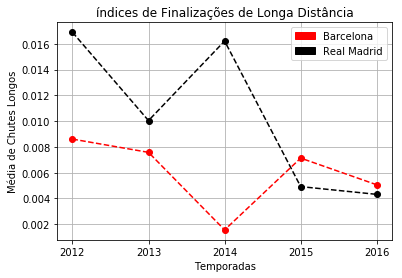

In [177]:
eixo_temporadas = df_Real['ano']
plt.plot(eixo_temporadas, df_Real['indice_chute_longo'], 'go', color='black')
plt.plot(eixo_temporadas, df_Real['indice_chute_longo'], '--', color='black')

plt.plot(eixo_temporadas, df_Barcelona['indice_chute_longo'], 'ro')
plt.plot(eixo_temporadas, df_Barcelona['indice_chute_longo'], '--', color='red')

plt.title("índices de Finalizações de Longa Distância")
plt.grid(True)

preto_patch = mpatches.Patch(color='black', label='Real Madrid')
vermelho_patch = mpatches.Patch(color='red', label='Barcelona')

plt.legend(handles=[vermelho_patch, preto_patch])

plt.xlabel("Temporadas")
plt.ylabel("Média de Chutes Longos")

* **O maior índice de finalizações de longa distância do Real Madrid é 1.6% do total de chutes, alcançado em 2012.**
* **Já o Barcelona tem como maior índice 0.8%, valor alcançado também em 2012.**